In [1]:
##importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
%matplotlib inline

In [2]:
spark=SparkSession.builder.appName("hr_data").master("local").getOrCreate()
spark

In [3]:
df=spark.read.format("csv").option("header","True").load("employee_review.csv")

In [5]:
df.show()

+-----+-------+-----------------+-------------+--------------------+--------------------+--------------------+--------------------+---------------+------------------+--------------------+--------------------------+------------------+----------------------+
|Index|company|         location|        dates|           job-title|             summary|                pros|                cons|overall-ratings|work-balance-stars|culture-values-stars|carrer-opportunities-stars|comp-benefit-stars|senior-mangemnet-stars|
+-----+-------+-----------------+-------------+--------------------+--------------------+--------------------+--------------------+---------------+------------------+--------------------+--------------------------+------------------+----------------------+
|    1| google|             none| Dec 11; 2018|Current Employee ...|Best Company to w...|People are smart ...|Bureaucracy is sl...|              5|                 4|                   5|                         5|               

In [8]:
print((df.count(),len(df.columns)))

(67529, 14)


In [9]:
type(df)

pyspark.sql.dataframe.DataFrame

In [10]:
df.head()

Row(Index='1', company='google', location='none', dates=' Dec 11; 2018', job-title='Current Employee - Anonymous Employee', summary='Best Company to work for', pros='People are smart and friendly', cons='Bureaucracy is slowing things down', overall-ratings='5', work-balance-stars='4', culture-values-stars='5', carrer-opportunities-stars='5', comp-benefit-stars='4', senior-mangemnet-stars='5')

In [11]:
df.groupby("company").count().orderBy("count",asc=False).show()

+---------+-----+
|  company|count|
+---------+-----+
|  netflix|  810|
| facebook| 1590|
|   google| 7819|
|    apple|12950|
|microsoft|17930|
|   amazon|26430|
+---------+-----+



In [ ]:
##plots of company rating

In [13]:
df2=df.select('overall-ratings',
 'work-balance-stars',
 'culture-values-stars',
 'carrer-opportunities-stars',
 'comp-benefit-stars',
 'senior-mangemnet-stars','company')

In [16]:
df3=df2.toPandas().to_csv("review.csv")
df3=pd.read_csv("review.csv")


In [25]:
df3.drop(columns=["Unnamed: 0"],inplace=True)

In [12]:
df.columns

['Index',
 'company',
 'location',
 'dates',
 'job-title',
 'summary',
 'pros',
 'cons',
 'overall-ratings',
 'work-balance-stars',
 'culture-values-stars',
 'carrer-opportunities-stars',
 'comp-benefit-stars',
 'senior-mangemnet-stars']

In [26]:
df3

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,company
0,5,4,5,5,4,5,google
1,4,2,3,3,5,3,google
2,5,5,4,5,5,4,google
3,5,2,5,5,4,5,google
4,5,5,5,5,5,5,google
...,...,...,...,...,...,...,...
67524,3,3,none,4,4,2,microsoft
67525,3,1.5,none,2.5,4,2.5,microsoft
67526,4,3,none,4,4.5,3.5,microsoft
67527,3,2,none,3,3.5,3,microsoft


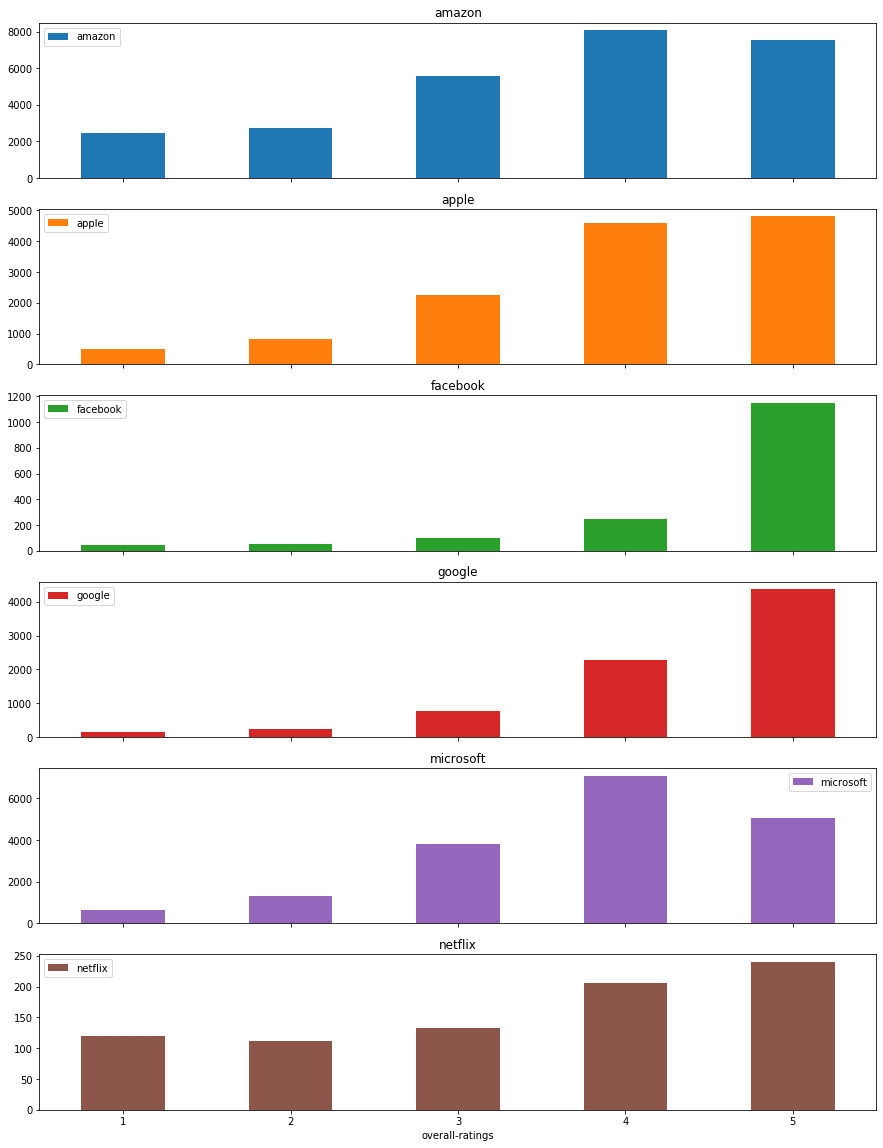

In [27]:
df3.groupby(["overall-ratings","company"]).size().unstack().plot.bar(subplots=True,rot=0,figsize=(15,20),legend=True)
plt.show()

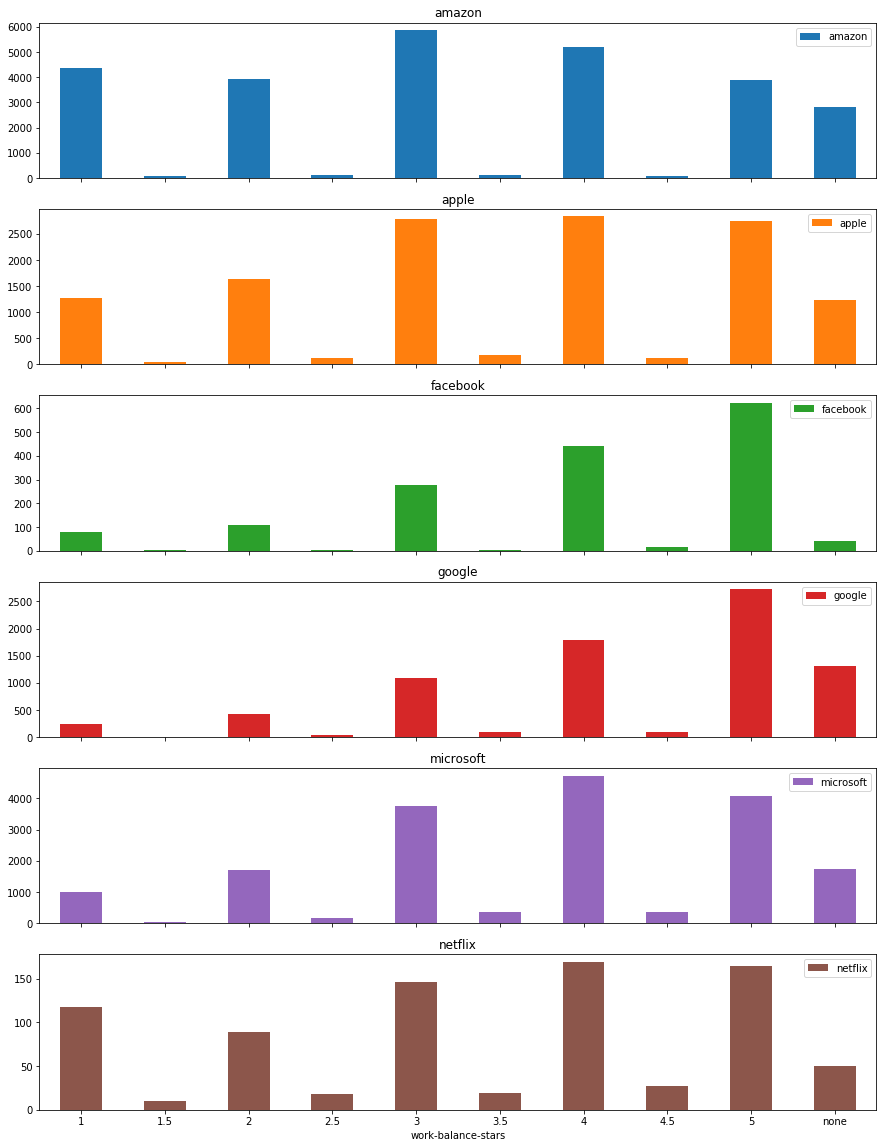

In [28]:
df3.groupby(["work-balance-stars","company"]).size().unstack().plot.bar(subplots=True,rot=0,figsize=(15,20),legend=True)
plt.show()

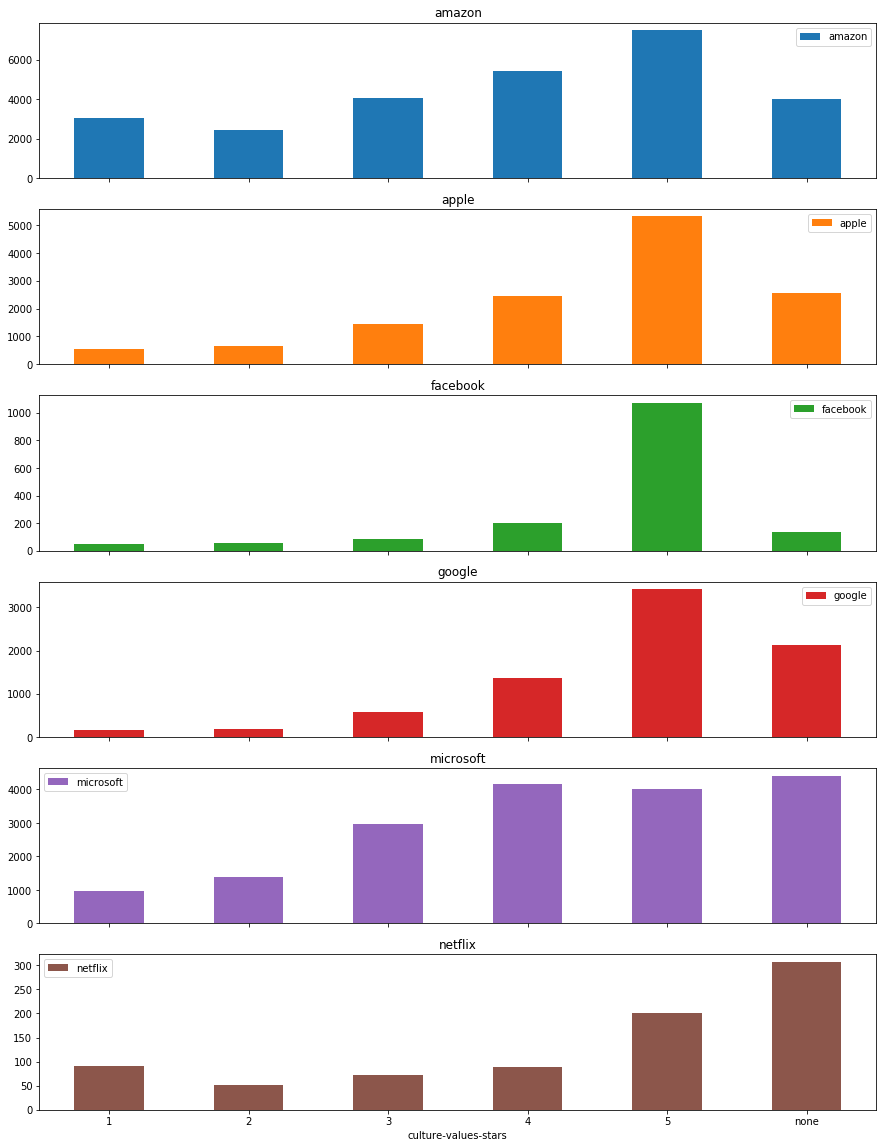

In [31]:
df3.groupby(["culture-values-stars","company"]).size().unstack().plot.bar(subplots=True,rot=0,figsize=(15,20),legend=True)
plt.show()

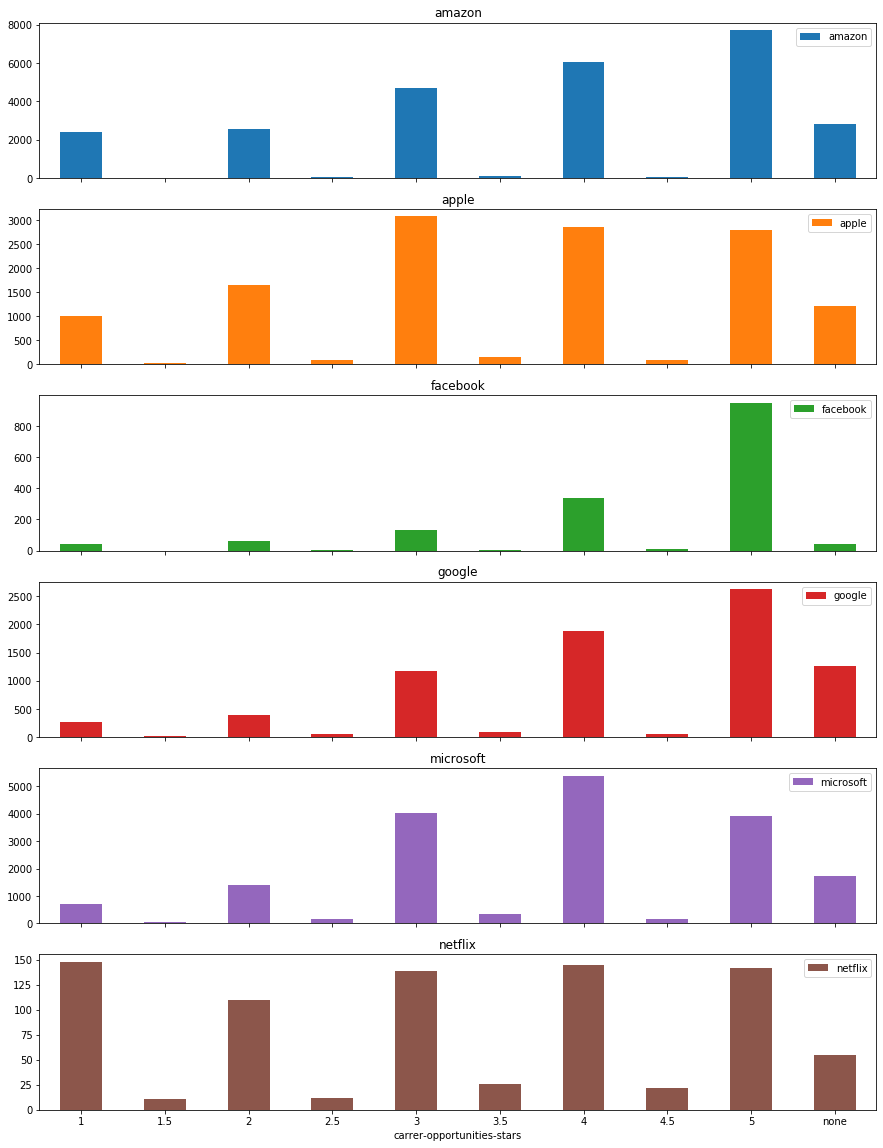

In [32]:
df3.groupby(["carrer-opportunities-stars","company"]).size().unstack().plot.bar(subplots=True,rot=0,figsize=(15,20),legend=True)
plt.show()

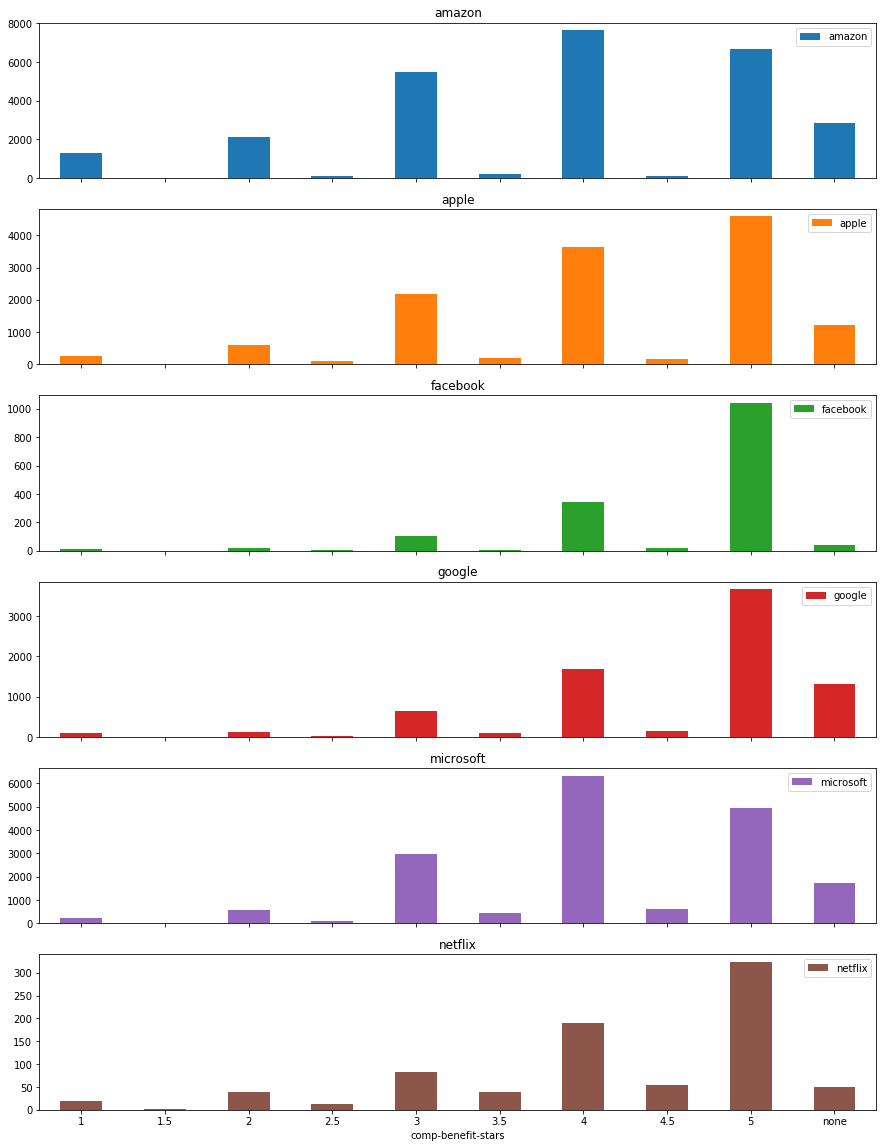

In [33]:
df3.groupby(["comp-benefit-stars","company"]).size().unstack().plot.bar(subplots=True,rot=0,figsize=(15,20),legend=True)
plt.show()

In [29]:
df3.columns

Index(['overall-ratings', 'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'company'],
      dtype='object')

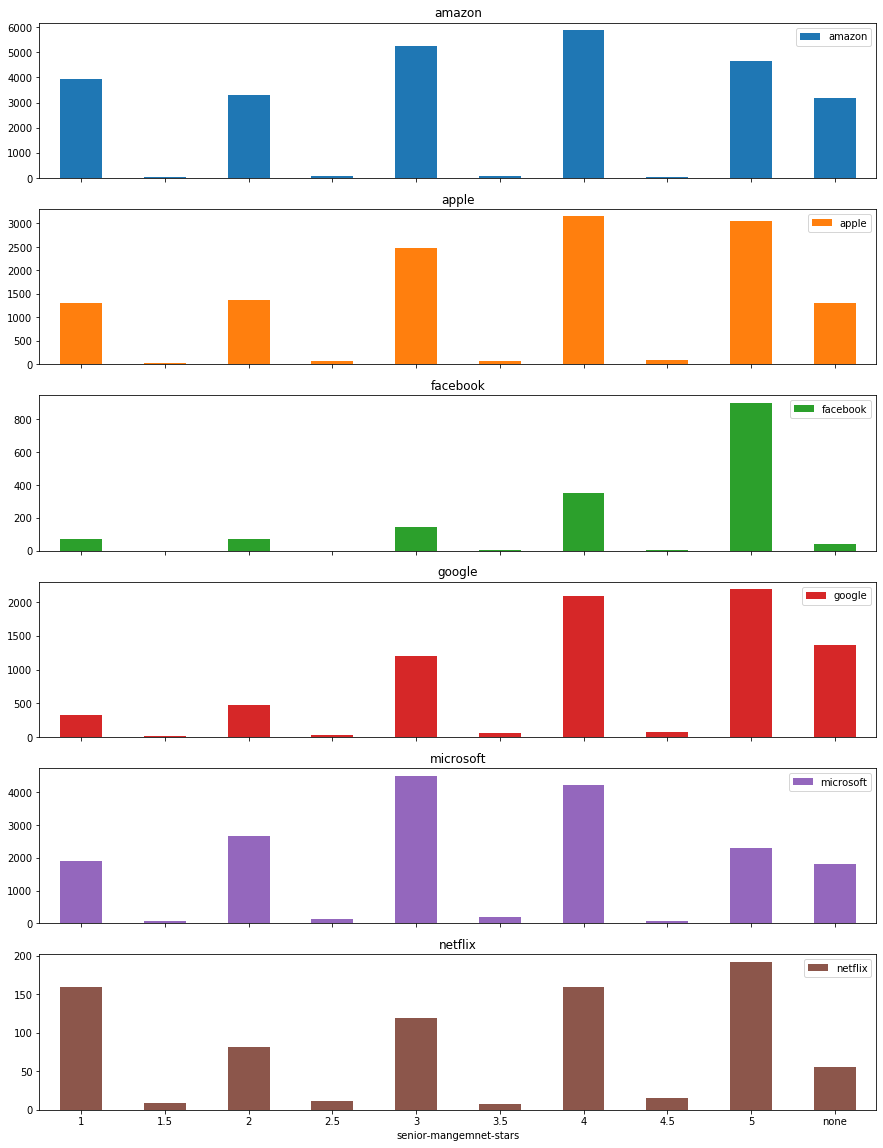

In [36]:
df3.groupby(["senior-mangemnet-stars","company"]).size().unstack().plot.bar(subplots=True,rot=0,figsize=(15,20),legend=True)
plt.show()

In [ ]:
## HEATMAPS

In [37]:
def plot_heatmap(dataCol1, dataCol2, heading):
    grpby = df3.groupby([dataCol1, dataCol2]).size()
    pct = grpby.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))
    unstk_data = pct.unstack()
    fig, ax = plt.subplots()
    sns.heatmap(unstk_data, annot=True, linewidths=.5, ax=ax, cmap='YlGn')
    ax.set_title(heading)
    fig.tight_layout()
    plt.show()

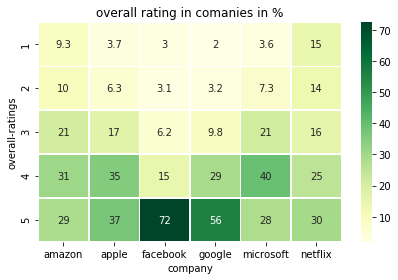

In [38]:
plot_heatmap("overall-ratings","company","overall rating in comanies in %")

In [39]:
## Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are:
### 72% people in FB have rated it 5 and overall 87% people are very happy working in FB. This is followed by Gogle with 85%
### NetFlix has got a 55-45% which means people have neutral say about the company
### 60% people are happy with Amazon
### 72% people are happy with Apple
### 68% people are happy with Microsoft

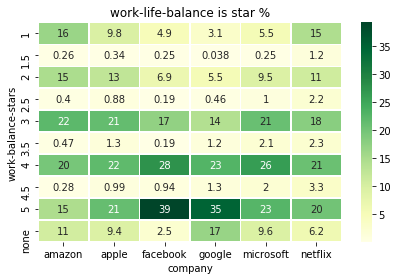

In [40]:
plot_heatmap("work-balance-stars","company","work-life-balance is star %")

In [41]:
## Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are for Work/Life Balance
### 46.2% people in amazon have a W/L balance
### 54% apple 
### 70.5% FB
### 76.3% Google
### 60.6% Microsoft
### 50.5% Netflix

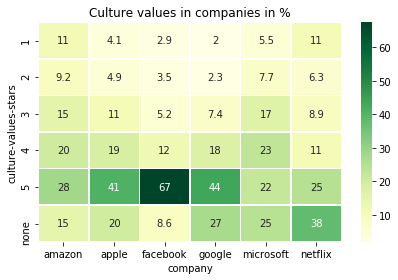

In [42]:
plot_heatmap("culture-values-stars","company","Culture values in companies in %")

In [43]:
## In cultural values,
### Facebook leads with 89%
### Amazon 48%
### Apple 60%
### GOogle 62%
### Microsoft 45%
### Netflix 36%

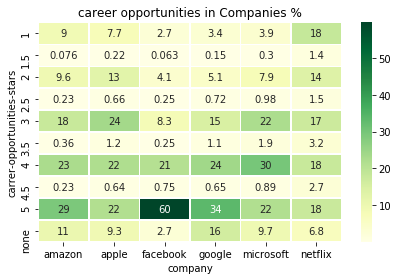

In [44]:
plot_heatmap("carrer-opportunities-stars","company","career opportunities in Companies %")

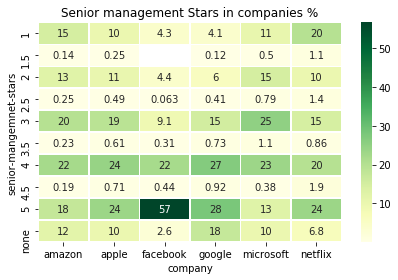

In [45]:
plot_heatmap("senior-mangemnet-stars","company","Senior management Stars in companies %")